In [2]:
import conllu
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
splits = ['train', 'dev', 'test']

for split in splits:
    with open(f"it_twittiro-ud-{split}.conllu", "r", encoding="utf-8") as f:
        data = conllu.parse(f.read())
    
    # Estrai i testi e conta i token
    texts = []
    token_counts = []

    for i, sentence in enumerate(data):
        # Salva il testo se presente nei metadata
        if sentence.metadata and 'text' in sentence.metadata:
            texts.append(sentence.metadata['text'])

        # Conta i token (ignora eventuali elementi non-token come empty nodes)
        token_count = len([token for token in sentence if isinstance(token['id'], int)])
        token_counts.append(token_count)

    # Calcola la media
    average_tokens = sum(token_counts) / len(token_counts)
    print(f"{split} set:")
    print(f"Numero medio di token per frase: {average_tokens:.2f}")
    print(f"Numero totale di frasi: {len(data)}")
    print('\n')

train set:
Numero medio di token per frase: 20.77
Numero totale di frasi: 1138


dev set:
Numero medio di token per frase: 20.80
Numero totale di frasi: 144


test set:
Numero medio di token per frase: 20.96
Numero totale di frasi: 142




In [4]:
splits = ['train', 'dev', 'test']
rhetoric_counter = Counter()
lista = set()

for split in splits:
    with open(f"it_twittiro-ud-{split}.conllu", "r", encoding="utf-8") as f:
        data = conllu.parse(f.read())

    for sentence in data:
        if sentence.metadata and 'twittiro' in sentence.metadata:
            # Prende la parte destra della riga "twittiro = ..." e poi prende l'ultima parola come figura retorica
            figure = sentence.metadata['twittiro'].split()[-1]
            rhetoric_counter[figure] += 1


# Stampa la distribuzione
print("Distribuzione delle figure retoriche:")
for figure, count in rhetoric_counter.items():
    print(f"{figure}: {count}")


Distribuzione delle figure retoriche:
ANALOGY: 261
EUPHEMISM: 84
HYPERBOLE: 81
SHIFT: 185
ASSERTION: 117
QUESTION: 221
PARADOX: 277
OTHER: 198


C:\Users\micha\AppData\Local\Temp\ipykernel_28248\4199466072.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=distribution.values, y=distribution.index, palette="viridis")
C:\Users\micha\AppData\Local\Temp\ipykernel_28248\4199466072.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)


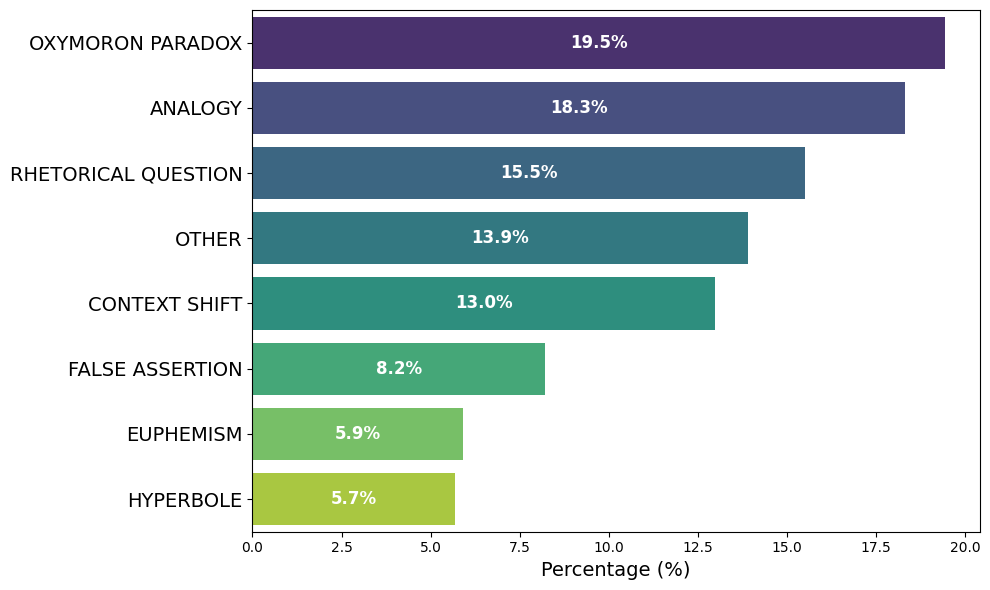

In [13]:
# Conta le figure retoriche
splits = ['train', 'dev', 'test']
rhetoric_counter = Counter()

for split in splits:
    with open(f"it_twittiro-ud-{split}.conllu", "r", encoding="utf-8") as f:
        data = conllu.parse(f.read())

    for sentence in data:
        if sentence.metadata and 'twittiro' in sentence.metadata:
            # Usa solo il nome della figura (es: "ANALOGY")
            figure = sentence.metadata['twittiro'].split()[-1]
            rhetoric_counter[figure] += 1

# Prepara i dati per il plot
total = sum(rhetoric_counter.values())
distribution = pd.Series({k: (v / total) * 100 for k, v in rhetoric_counter.items()})
distribution = distribution.sort_values(ascending=False)

# rename SHIFT to EX:CONTEXT SHIFT
distribution = distribution.rename({'SHIFT': 'CONTEXT SHIFT'})
# rename QUESTION TO RHETORICAL QUESTION
distribution = distribution.rename({'QUESTION': 'RHETORICAL QUESTION'})
# rename ASSERTION to IM:FALSE ASSERTION
distribution = distribution.rename({'ASSERTION': 'FALSE ASSERTION'})
# rename PARADOX to EX:OXYMORON PARADOX
distribution = distribution.rename({'PARADOX': 'OXYMORON PARADOX'})

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=distribution.values, y=distribution.index, palette="viridis")
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('')  # Nessuna etichetta sull'asse Y

# Ingrandisce le label dell'asse Y (i nomi delle figure retoriche)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)

# Aggiunge le percentuali dentro le barre
for i, value in enumerate(distribution.values):
    plt.text(value / 2, i, f"{value:.1f}%", color='white', ha='center', va='center', fontsize=12, fontweight='bold')

plt.tight_layout()

# Salva il grafico in formato SVG
plt.savefig("twittiro_distribution.svg", format="svg")

plt.show()

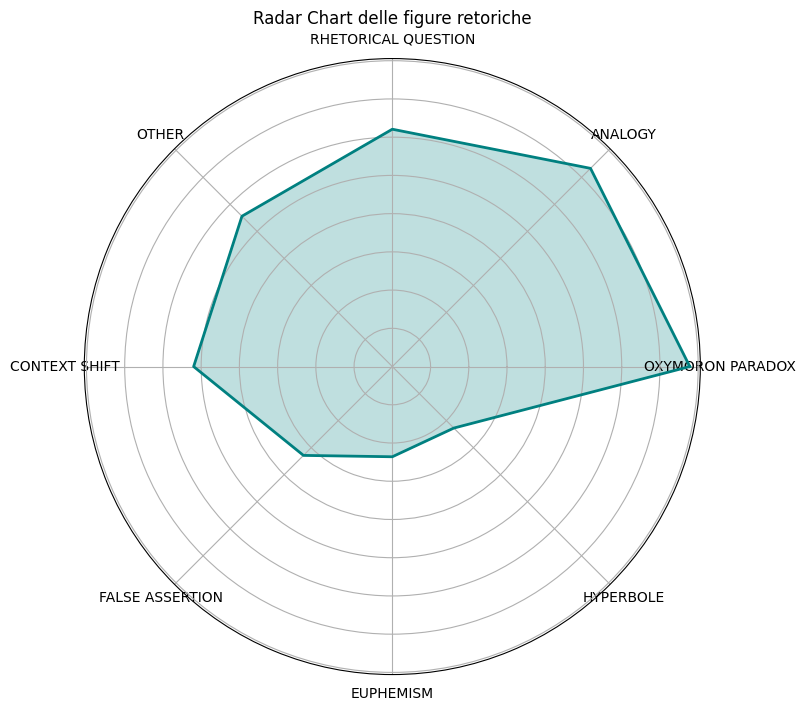

In [6]:
import numpy as np

labels = distribution.index.tolist()
values = distribution.values.tolist()
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

# Chiudere il cerchio
values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, values, color='teal', linewidth=2)
ax.fill(angles, values, color='teal', alpha=0.25)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title("Radar Chart delle figure retoriche")
plt.show()


In [7]:
plt.style.use('default')  # Ripristina lo stile chiaro predefinito

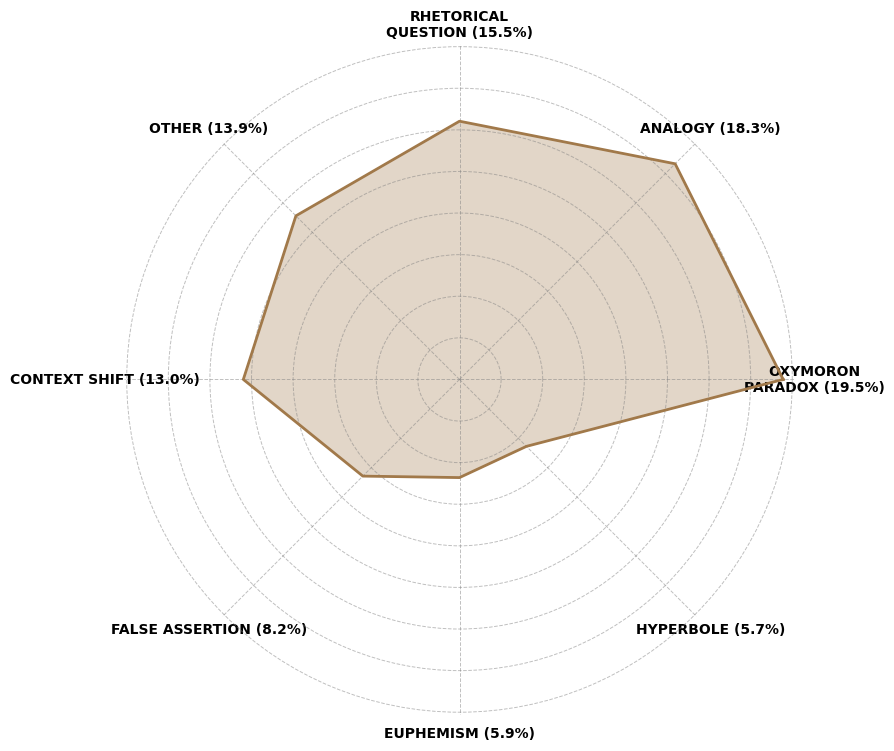

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Dati ---
labels = distribution.index.tolist()
values = distribution.values.tolist()
percent_values = [f"{v:.1f}%" for v in values]

# Combina label e percentuale e metti in maiuscolo
def split_label(label, max_len=15):
    if len(label) > max_len:
        # Cerca uno spazio dove spezzare
        parts = label.upper().split()
        if len(parts) > 1:
            mid = len(parts) // 2
            return ' '.join(parts[:mid]) + '\n' + ' '.join(parts[mid:])
        else:
            return label[:max_len] + '\n' + label[max_len:]
    return label.upper()

labels_with_percent = [f"{split_label(lab)} ({perc})" for lab, perc in zip(labels, percent_values)]


# Chiudi il cerchio
values += values[:1]
labels_with_percent += labels_with_percent[:1]
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

# --- Scegli una palette e un colore ---
palette_name = "cubehelix"
color = sns.color_palette(palette_name, n_colors=1)[0]

# --- Plot ---
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))
ax.plot(angles, values, color=color, linewidth=2)
ax.fill(angles, values, color=color, alpha=0.3)

# Imposta le etichette con percentuali in maiuscolo e grassetto
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels_with_percent[:-1], fontsize=10, fontweight='bold')

ax.set_yticklabels([])  # Nasconde etichette Y

# Rendi i bordi dei cerchi più chiari (leggeri)
ax.grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.5)  # linee griglia leggere e pallide

# Riduci anche la linea dei raggi
ax.spines['polar'].set_visible(False)  # opzionale: togli il bordo esterno per un effetto più pulito

plt.tight_layout()
plt.show()
